In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('diabetes_data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
x = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']

In [12]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

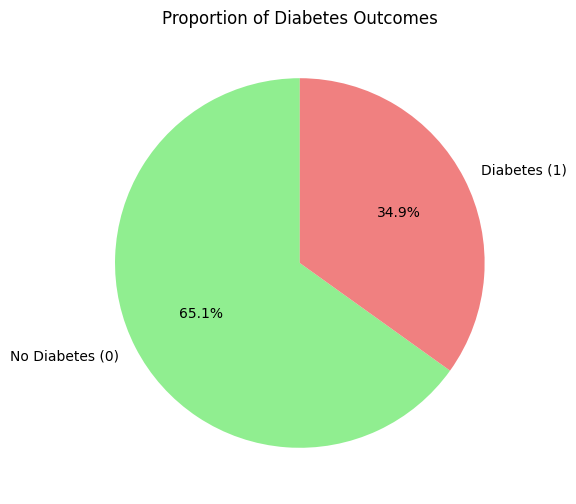

In [13]:
outcome_counts = df['Outcome'].value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']
sizes = outcome_counts.values
colors = ['lightgreen', 'lightcoral']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetes Outcomes')
plt.show()

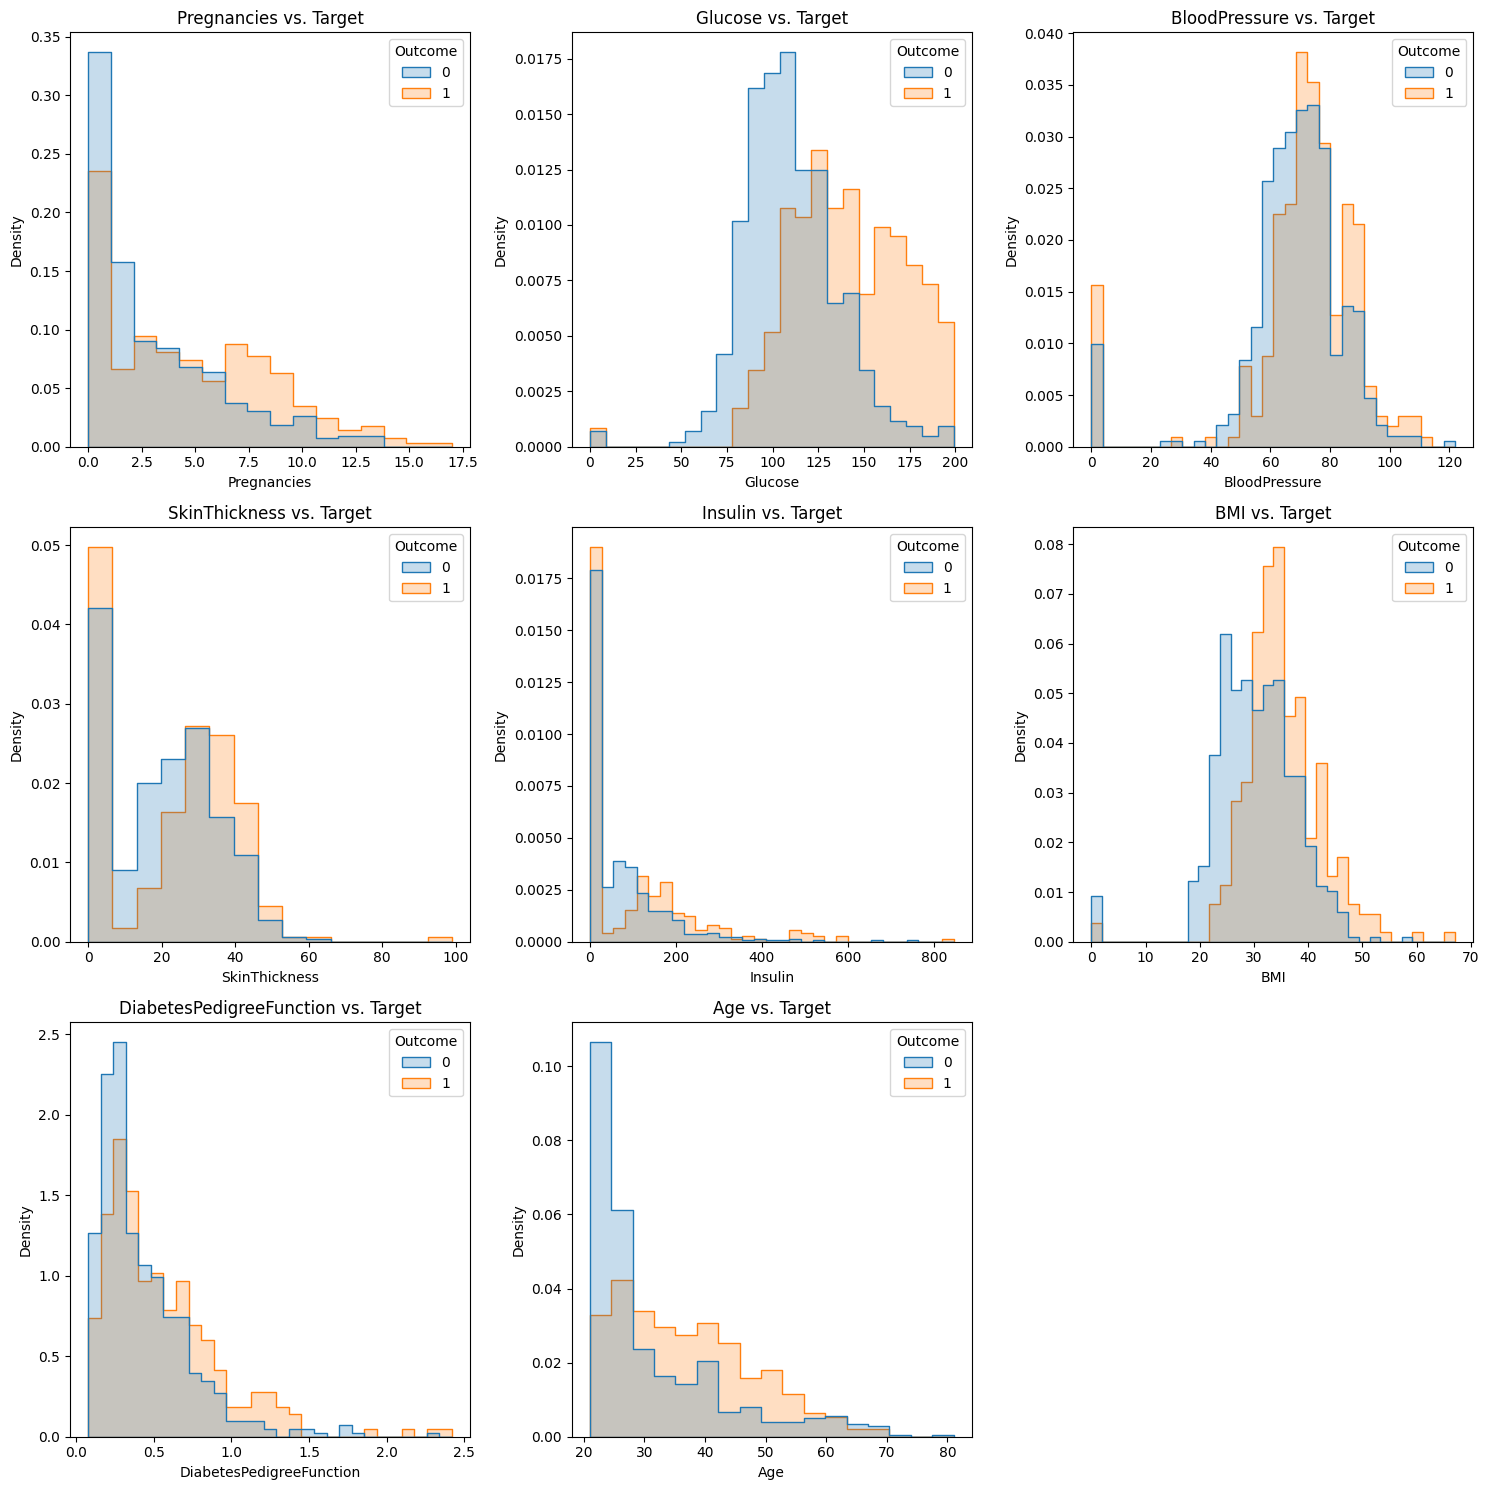

In [14]:
features = df.drop(columns=['Outcome'], axis=1).columns

num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.histplot(data=df, x=feature, hue='Outcome', element='step', stat='density', common_norm=False, ax=ax) # Changed 'target' to 'Outcome'
    ax.set_title(f'{feature} vs. Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

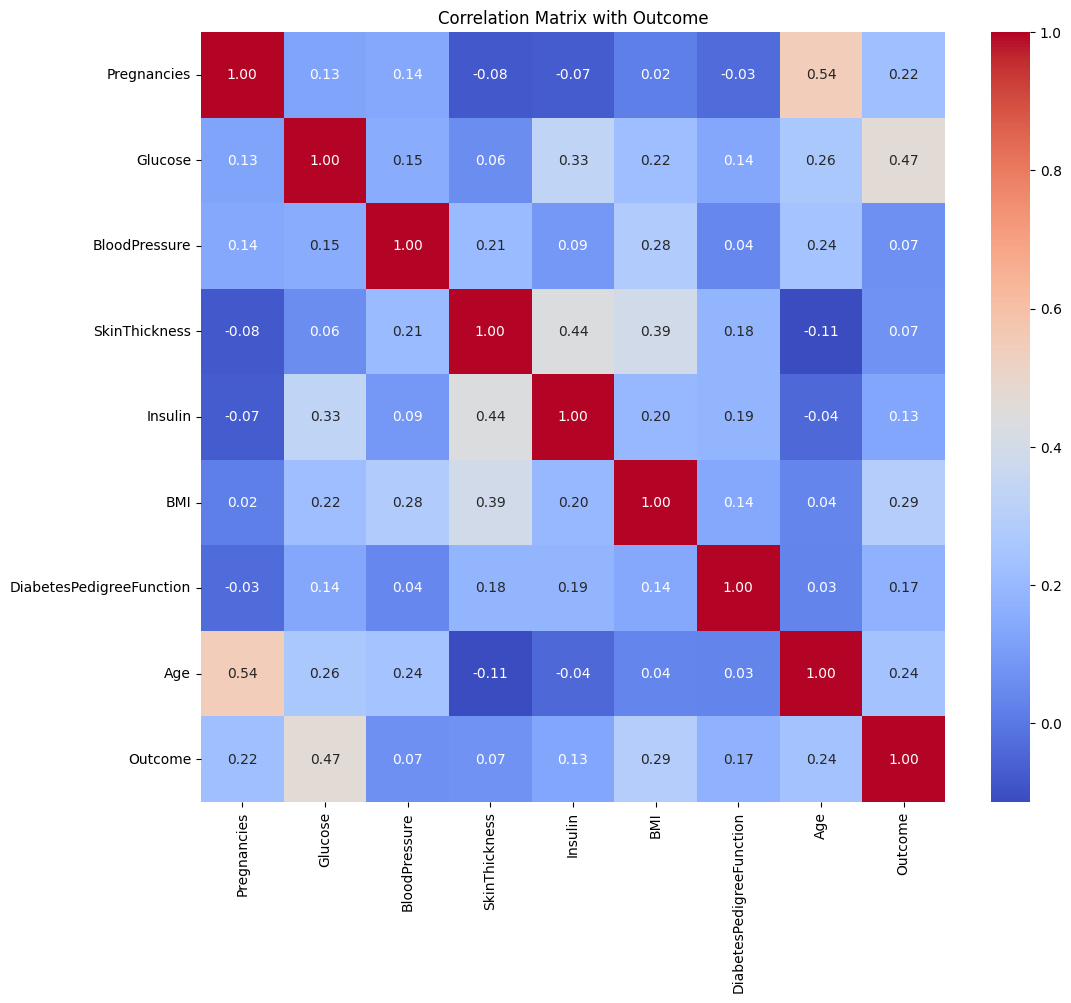

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Outcome')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Disable label encoder for XGBoost
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Logistic Regression": LogisticRegression()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("-" * 20)

Training SVM...
SVM Accuracy: 0.7662
--------------------
Training Decision Tree...
Decision Tree Accuracy: 0.7662
--------------------
Training Random Forest...
Random Forest Accuracy: 0.7403
--------------------
Training XGBoost...
XGBoost Accuracy: 0.7078
--------------------
Training AdaBoost...
AdaBoost Accuracy: 0.7792
--------------------
Training Extra Trees...
Extra Trees Accuracy: 0.7273
--------------------
Training Logistic Regression...
Logistic Regression Accuracy: 0.7468
--------------------


In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
X = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM": (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}),
    "AdaBoost": (AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}),
    "Extra Trees": (ExtraTreesClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})
}

best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_model = (model_name, grid_search.best_estimator_)

print(f"Best model: {best_model[0]} with accuracy: {best_accuracy:.4f}")

best_model_name, best_model_estimator = best_model

if best_model_name == "Random Forest":
    refined_param_grid = {
        'n_estimators': [250, 300, 350],
        'max_depth': [8, 10, 12],
        'min_samples_split': [2, 3, 4]
    }
    grid_search = GridSearchCV(best_model_estimator, refined_param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Refined parameters for {best_model_name}: {grid_search.best_params_}")
    print(f"Refined accuracy for {best_model_name}: {grid_search.best_score_:.4f}")

Best model: Random Forest with accuracy: 0.7802
Refined parameters for Random Forest: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 300}
Refined accuracy for Random Forest: 0.7883


In [20]:
feature_names = x.columns
input_data = []
for feature in feature_names:
    value = float(input(f"Enter value for '{feature}': "))
    input_data.append(value)

input_data_df = pd.DataFrame([input_data], columns=feature_names)

prediction = best_model_estimator.predict(input_data_df)

print("Prediction:", prediction[0])

if prediction[0] == 0:
    print("Prediction: The patient does not have diabetes.")
else:
    print("Prediction: The patient has diabetes.")

Prediction: 1
Prediction: The patient has diabetes.


In [21]:
import pickle
filename = 'diabetes_prediction_model.pkl'
pickle.dump(best_model_estimator, open(filename, 'wb'))

print(f"Model saved to {filename}")
loaded_model = pickle.load(open(filename, 'rb'))

Model saved to diabetes_prediction_model.pkl
